# Book Recommender System

The data used is found [here](http://www2.informatik.uni-freiburg.de/~cziegler/BX/)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Importing and knowing the data

If you have no way of finding out the correct encoding of the file, then try the following encodings, in this order:

    utf-8
    iso-8859-1 (also known as latin-1)
    (This is the encoding of all census data and much other data produced by government entities.)
    utf-16


In [3]:
books = pd.read_csv('BX-Books.csv', error_bad_lines= False, sep= ';', encoding= 'iso-8859-1')
books.head()

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
ratings = pd.read_csv('BX-Book-Ratings.csv',sep = ';', error_bad_lines= False, encoding= 'iso-8859-1')
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [5]:
users = pd.read_csv('BX-Users.csv', sep = ';', error_bad_lines= False, encoding= 'iso-8859-1')
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [6]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
ISBN                   271360 non-null object
Book-Title             271360 non-null object
Book-Author            271359 non-null object
Year-Of-Publication    271360 non-null object
Publisher              271358 non-null object
Image-URL-S            271360 non-null object
Image-URL-M            271360 non-null object
Image-URL-L            271357 non-null object
dtypes: object(8)
memory usage: 16.6+ MB


In [7]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
User-ID     278858 non-null int64
Location    278858 non-null object
Age         168096 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [8]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
User-ID        1149780 non-null int64
ISBN           1149780 non-null object
Book-Rating    1149780 non-null int64
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


#### Checking the types of data columns

In [9]:
print(books.dtypes)

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object


In [10]:
print(ratings.dtypes)

User-ID         int64
ISBN           object
Book-Rating     int64
dtype: object


In [11]:
print(books.dtypes)

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object


### ---------------------------------------------------------------------------------------------------------------------------------------------------------

### Cleaning the Data

#### Dropping the Unnecessary Columns

In [12]:
books.drop(labels = ['Image-URL-S','Image-URL-M','Image-URL-L'], axis = 1, inplace = True)

In [13]:
books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [14]:
print('Total Unique Values: '+str(books['Year-Of-Publication'].nunique()))

Total Unique Values: 202


In [15]:
x = books['Publisher'].unique()

Issues with the column:
* Some values are Names which seem like misplaced values
* There are few 0 entries
* There are years greater than 2004 hoewver the data source suggests that data is of September 2004
* There are some years in string format other in integer.

In [16]:
pd.set_option('display.max_colwidth', -1) #setting appropriate width

In [17]:
books[books['Year-Of-Publication'] == 'DK Publishing Inc']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\"";Michael Teitelbaum""",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\"";James Buckley""",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg


We can observe the incorrect recording of data in the **Book-Author** and **Year-Of-Publication** columns.  
We will correct such mistakes.

In [18]:
books.iloc[209538]['Year-Of-Publication'] = 2000
books.iloc[209538]['Book-Author'] = 'Michael Teitelbaum'
books.iloc[209538]['Publisher'] = 'DK Publishing Inc'
books.iloc[209538]['Book-Title'] = 'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)'

In [19]:
books.iloc[221678]['Year-Of-Publication'] = 2000
books.iloc[221678]['Book-Author'] = 'James Buckley'
books.iloc[221678]['Publisher'] = 'DK Publishing Inc'
books.iloc[221678]['Book-Title'] = 'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)'

Can also be done as :
    
books.loc[books['ISBN'] == '0789466953', 'Year-Of-Publication'] = 2000  
books.loc[books['ISBN'] == '0789466953', 'Book-Author'] = 'James Buckley'  
books.loc[books['ISBN'] == '0789466953', 'Publisher'] = 'DK Publishing Inc'  
books.loc[books['ISBN'] == '0789466953', 'Book-Title'] = 'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)'

In [20]:
books.iloc[209538]

ISBN                   078946697X                                                                    
Book-Title             DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)
Book-Author            Michael Teitelbaum                                                            
Year-Of-Publication    2000                                                                          
Publisher              DK Publishing Inc                                                             
Name: 209538, dtype: object

In [21]:
books.iloc[221678]

ISBN                   0789466953                                                                                
Book-Title             DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)
Book-Author            James Buckley                                                                             
Year-Of-Publication    2000                                                                                      
Publisher              DK Publishing Inc                                                                         
Name: 221678, dtype: object

Both are corrrected

In [22]:
books[books['Year-Of-Publication'] == 'Gallimard']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-Marie Gustave Le ClÃ?Â©zio""",2003,Gallimard,http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg


In [23]:
books.iloc[220731]['Year-Of-Publication'] = 2003
books.iloc[220731]['Book-Author'] = 'Jean-Marie Gustave Le Clézio'
books.iloc[220731]['Publisher'] = 'Gallimard'
books.iloc[220731]['Book-Title'] = 'Peuple du ciel, suivi de Les Bergers'

In [24]:
books.iloc[220731]

ISBN                   2070426769                          
Book-Title             Peuple du ciel, suivi de Les Bergers
Book-Author            Jean-Marie Gustave Le Clézio        
Year-Of-Publication    2003                                
Publisher              Gallimard                           
Name: 220731, dtype: object

#### Handling the 0s and Incorrect Years

In [25]:
books['Year-Of-Publication'] = pd.to_numeric(books['Year-Of-Publication'])

In [26]:
books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984,    0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, 2012, 2006, 1909, 2008, 1378,
       1919, 1922, 1897, 2024, 1376, 2037], dtype=int64)

In [27]:
print('New Unique Values: '+str(books['Year-Of-Publication'].nunique()))

New Unique Values: 116


We can observe that the number of unique values has decreased.

In [28]:
books[(books['Year-Of-Publication'] == 0) | (books['Year-Of-Publication'] > 2004)] = np.nan

In [29]:
books['Year-Of-Publication'].unique()

array([2002., 2001., 1991., 1999., 2000., 1993., 1996., 1988., 2004.,
       1998., 1994., 2003., 1997., 1983., 1979., 1995., 1982., 1985.,
       1992., 1986., 1978., 1980., 1952., 1987., 1990., 1981., 1989.,
       1984.,   nan, 1968., 1961., 1958., 1974., 1976., 1971., 1977.,
       1975., 1965., 1941., 1970., 1962., 1973., 1972., 1960., 1966.,
       1920., 1956., 1959., 1953., 1951., 1942., 1963., 1964., 1969.,
       1954., 1950., 1967., 1957., 1940., 1937., 1955., 1946., 1936.,
       1930., 1925., 1948., 1943., 1947., 1945., 1923., 1939., 1926.,
       1938., 1911., 1904., 1949., 1932., 1928., 1929., 1927., 1931.,
       1914., 1934., 1910., 1933., 1902., 1924., 1921., 1900., 1944.,
       1917., 1901., 1908., 1906., 1935., 1806., 1909., 1378., 1919.,
       1922., 1897., 1376.])

In [30]:
print('New Unique Values after nan: '+str(books['Year-Of-Publication'].nunique()))

New Unique Values after nan: 101


In [31]:
books['Year-Of-Publication'].fillna(round(books['Year-Of-Publication'].mean()), inplace = True)

Now convert to int32

In [32]:
books['Year-Of-Publication'] = books['Year-Of-Publication'].astype(np.int32)

In [33]:
sum(books['Book-Title'].isnull())

4690

We can observe that there are **Book-Title** and **ISBN** both are missing. We can drop such columns.

In [34]:
books.loc[books['Book-Author'].isna() & books['ISBN'].isna() ].head(10)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
176,NaN,NaN,NaN,1994,NaN
188,NaN,NaN,NaN,1994,NaN
288,NaN,NaN,NaN,1994,NaN
351,NaN,NaN,NaN,1994,NaN
542,NaN,NaN,NaN,1994,NaN
641,NaN,NaN,NaN,1994,NaN
646,NaN,NaN,NaN,1994,NaN
728,NaN,NaN,NaN,1994,NaN
732,NaN,NaN,NaN,1994,NaN
735,NaN,NaN,NaN,1994,NaN


In [35]:
len(books.loc[(books['Book-Title'].isna()) & (books['Book-Title'].isna())])

4690

In [36]:
books.dropna(axis=0, how='all', subset=['ISBN','Book-Title'], inplace= True)

In [37]:
books.loc[books['Book-Author'].isna() & books['ISBN'].isna() ].head(10)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher


No null columns now!

In [38]:
ratings['Book-Rating'].unique()

array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2], dtype=int64)

In [39]:
users['Age'].isna().value_counts()

False    168096
True     110762
Name: Age, dtype: int64

In [40]:
users.sort_values(by = 'Age',ascending = False).head()

,User-ID,Location,Age
20856,20857,"stuttgart, baden-wuerttemberg, germany",244.0
8781,8782,"calgary, alberta, canada",239.0
58285,58286,"midvale, utah, usa",237.0
1578,1579,"akure, ondo/nigeria, nigeria",231.0
8457,8458,"milano, lombardia, italy",230.0


In [41]:
users.sort_values(by = 'Age',ascending = True).head()

,User-ID,Location,Age
162239,162240,"buffalo, new york, usa",0.0
130115,130116,"lower templestowe, victoria, australia",0.0
135953,135954,"powder springs, georgia, usa",0.0
207490,207491,"manassas, virginia, usa",0.0
189924,189925,"san francisco, california, usa",0.0


We can see that age below 7 and ages above 100 do not make much sense. 
SO, converting age values below 7 years and above 100 into nan. Then filling all missing values with mean age.

In [42]:
users['Age'].unique()

array([ nan,  18.,  17.,  61.,  26.,  14.,  25.,  19.,  46.,  55.,  32.,
        24.,  20.,  34.,  23.,  51.,  31.,  21.,  44.,  30.,  57.,  43.,
        37.,  41.,  54.,  42.,  50.,  39.,  53.,  47.,  36.,  28.,  35.,
        13.,  58.,  49.,  38.,  45.,  62.,  63.,  27.,  33.,  29.,  66.,
        40.,  15.,  60.,   0.,  79.,  22.,  16.,  65.,  59.,  48.,  72.,
        56.,  67.,   1.,  80.,  52.,  69.,  71.,  73.,  78.,   9.,  64.,
       103., 104.,  12.,  74.,  75., 231.,   3.,  76.,  83.,  68., 119.,
        11.,  77.,   2.,  70.,  93.,   8.,   7.,   4.,  81., 114., 230.,
       239.,  10.,   5., 148., 151.,   6., 101., 201.,  96.,  84.,  82.,
        90., 123., 244., 133.,  91., 128.,  94.,  85., 141., 110.,  97.,
       219.,  86., 124.,  92., 175., 172., 209., 212., 237.,  87., 162.,
       100., 156., 136.,  95.,  89., 106.,  99., 108., 210.,  88., 199.,
       147., 168., 132., 159., 186., 152., 102., 116., 200., 115., 226.,
       137., 207., 229., 138., 109., 105., 228., 18

In [43]:
users[(users['Age'] < 7) | (users['Age'] > 100)] = np.nan

In [44]:
users['Age'].fillna(users['Age'].mean(),inplace = True)

In [45]:
users['Age'].isna().value_counts()

False    278858
Name: Age, dtype: int64

In [46]:
users['Age'] = users['Age'].astype('int32')

In [47]:
users.loc[users['User-ID'].isna()].head(10)

,User-ID,Location,Age
219,NaN,NaN,34
469,NaN,NaN,34
561,NaN,NaN,34
612,NaN,NaN,34
670,NaN,NaN,34
931,NaN,NaN,34
1148,NaN,NaN,34
1288,NaN,NaN,34
1322,NaN,NaN,34
1460,NaN,NaN,34


In [48]:
users.dropna(axis=0, how='all', subset=['User-ID','Location'], inplace= True)

In [49]:
sum(ratings['User-ID'].isna())

0

No missing values in ratings.

In [50]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


Here we synchronize all the datasets. We keep only the entries which are present in all three datasets.

In [51]:
ratings_new = ratings[ratings['ISBN'].isin(books['ISBN'])]
ratings_new = ratings[ratings['User-ID'].isin(users['User-ID'])]

## ---------------------------------------------------------------------------------------------------------------------------------

## Exploratory Analysis

In [52]:
ratings_new['Book-Rating'].value_counts()

0     712140
8     103142
10    78235 
7     76032 
9     67208 
5     50693 
6     36739 
4     8860  
3     5954  
2     2738  
1     1752  
Name: Book-Rating, dtype: int64

We can observe that there are unexpectedly large number of **0** values

So we will not use ratings which are 0

In [53]:
ratings_zero = ratings.loc[ratings['Book-Rating'] == 0]
ratings_nonzero = ratings.loc[ratings['Book-Rating'] > 0]

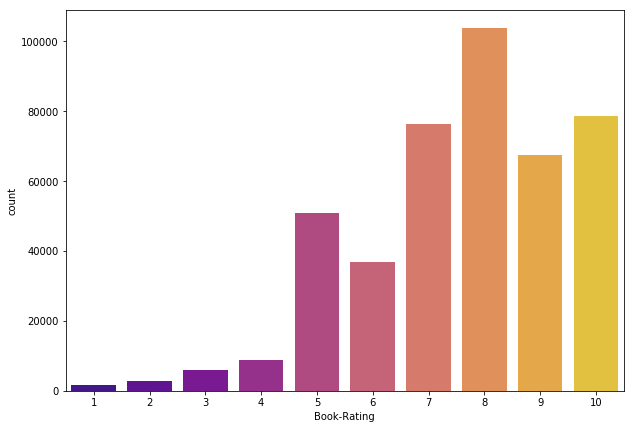

In [54]:
plt.figure(figsize= (10,7))
sns.countplot(ratings_nonzero['Book-Rating'], palette = 'plasma')

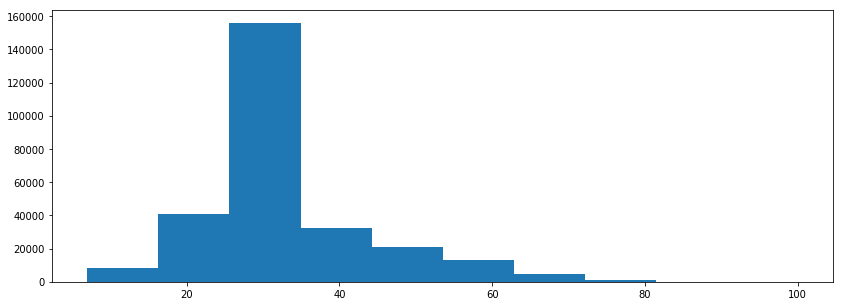

In [55]:
plt.figure(figsize= (14,5))
plt.hist(users['Age'])
plt.show()

### Recommendation as per popularity.

In [56]:
rating_count = ratings_new.groupby('ISBN')['Book-Rating'].count()
rating_count = rating_count.sort_values(ascending = False)

In [57]:
rating_count = pd.DataFrame(rating_count)
rating_count.reset_index(inplace= True)
rating_count.head()

,ISBN,Book-Rating
0,0971880107,2494
1,0316666343,1288
2,0385504209,877
3,0060928336,730
4,0312195516,722


In [58]:
most_rated_books = pd.merge(rating_count, books, on= 'ISBN')
most_rated_books.head(10)

,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0971880107,2494,Wild Animus,Rich Shapero,2004,Too Far
1,0316666343,1288,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown"
2,0385504209,877,The Da Vinci Code,Dan Brown,2003,Doubleday
3,0060928336,730,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial
4,0312195516,722,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA
5,044023722X,644,A Painted House,John Grisham,2001,Dell Publishing Company
6,0142001740,613,The Secret Life of Bees,Sue Monk Kidd,2003,Penguin Books
7,067976402X,611,Snow Falling on Cedars,David Guterson,1995,Vintage Books USA
8,0671027360,582,Angels &amp; Demons,Dan Brown,2001,Pocket Star
9,0446672211,582,Where the Heart Is (Oprah's Book Club (Paperback)),Billie Letts,1998,Warner Books


## --------------------------------------------------------------------------------------------------------------------------------

## Recommendation as per Correlations

We can use **Pearson's Correlation** to find similarity between two linear variables.

Finding the average ratings

In [59]:
rating_avg = pd.DataFrame(ratings_new.groupby('ISBN')['Book-Rating'].mean())
rating_avg.head()

,Book-Rating
ISBN,
0330299891,3.0
0375404120,1.5
0586045007,0.0
9022906116,3.5
9032803328,0.0


In [63]:
average_rating = pd.DataFrame(ratings_new.groupby('ISBN')['Book-Rating'].mean())
average_rating['ratingCount'] = pd.DataFrame(ratings.groupby('ISBN')['Book-Rating'].count())
average_rating.sort_values('ratingCount', ascending=False).head()

,Book-Rating,ratingCount
ISBN,,
0971880107,1.022053,2502
0316666343,4.464286,1295
0385504209,4.662486,883
0060928336,3.443836,732
0312195516,4.333795,723


In [64]:
average_rating.to_csv('average_rating.csv', index = False)

From the above observation we can see that the recommmendation based on most ratings may not be a good recommendation at all.

**We must drop users and books who have rated less than a decided threshold.  
We assume this limit to be 200**

In [65]:
countOfUsers1 = pd.DataFrame(ratings_new['User-ID'].value_counts())
countOfUsers1.reset_index(inplace= True)
countOfUsers1.rename(columns= {'index': 'counts'},inplace= True)

In [66]:
countOfUsers1.head()

,counts,User-ID
0,11676,13602
1,198711,7550
2,153662,6109
3,98391,5891
4,35859,5850


In [67]:
ratings_new = ratings_new[ratings_new['User-ID'].isin(countOfUsers1[countOfUsers1['counts'] >= 200].index)]

In [68]:
ratings_new.head()

,User-ID,ISBN,Book-Rating
9561,2,0195153448,0
9562,7,034542252,0
9563,8,0002005018,5
9564,8,0060973129,0
9565,8,0374157065,0


In [69]:
countOfBooks = pd.DataFrame(ratings_new['ISBN'].value_counts())

In [70]:
countOfBooks.head(5)

,ISBN
0971880107,938
0316666343,472
0385504209,352
0060928336,285
0312195516,265


In [71]:
countOfBooks.reset_index(inplace= True)
countOfBooks.rename(columns= {'index': 'ISBN', 'ISBN': 'counts'},inplace= True)

In [72]:
ratings_new.head()

,User-ID,ISBN,Book-Rating
9561,2,0195153448,0
9562,7,034542252,0
9563,8,0002005018,5
9564,8,0060973129,0
9565,8,0374157065,0


In [73]:
countOfBooks = ratings_new['Book-Rating'].value_counts()
ratings_final = ratings_new[ratings_new['Book-Rating'].isin(countOfBooks[countOfBooks >= 100].index)]
ratings_final.head()

,User-ID,ISBN,Book-Rating
9561,2,0195153448,0
9562,7,034542252,0
9563,8,0002005018,5
9564,8,0060973129,0
9565,8,0374157065,0


In [74]:
ca = ratings_final.iloc[0:40000,:]

In [75]:
cc = ca.pivot_table(index= 'User-ID', columns= 'ISBN', values= 'Book-Rating')

In [78]:
userID = cc.index
ISBN = cc.columns
print(cc.shape)

(4188, 29261)


In [89]:
item_ratings = cc['0590353403']
name_of_book = "Harry Potter and the sorcer's stone"
similar_to_item = cc.corrwith(item_ratings)
corr_item = pd.DataFrame(similar_to_item, columns=['pearsonR'])
corr_item.dropna(inplace=True)
corr_summary = corr_item.join(average_rating['ratingCount'])
similars = []

similars = corr_summary[corr_summary['ratingCount']>=300].sort_values('pearsonR', ascending=False).head(10)
similars.reset_index(inplace= True)  

In [80]:
books_corr_to_item = pd.DataFrame(similars['ISBN'], 
                                  index=np.arange(len(similars['ISBN'])), columns=['ISBN'])
corr_books = pd.merge(books_corr_to_item, books, on='ISBN')

#### Recommendations

In [91]:
similars.head()

,pearsonR,ratingCount
ISBN,,
0060987103,1.0,326
0684872153,1.0,326
0440221471,1.0,419
0971880107,1.0,2502
0385504209,1.0,883


In [84]:
print('Recommendations for '+name_of_book)
corr_books

Recommendations for Harry Potter and the sorcer's stone


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0060987103,Wicked: The Life and Times of the Wicked Witch of the West,Gregory Maguire,1996,Regan Books
1,0684872153,Angela's Ashes (MMP) : A Memoir,Frank McCourt,1999,Scribner
2,0440221471,The Runaway Jury,JOHN GRISHAM,1997,Dell
3,0971880107,Wild Animus,Rich Shapero,2004,Too Far
4,0385504209,The Da Vinci Code,Dan Brown,2003,Doubleday
5,0375726403,Empire Falls,Richard Russo,2002,Vintage Books USA
6,0804106304,The Joy Luck Club,Amy Tan,1994,Prentice Hall (K-12)
7,043935806X,Harry Potter and the Order of the Phoenix (Book 5),J. K. Rowling,2003,Scholastic
8,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown"
9,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial


## ---------------------------------------------------------------------------------------------------------------------------------